<H1 style = "font-size: 25px; 
background-color: #6b98d0; 
border-radius: 15px 50px;
padding: 10px; 
text-align: center; color: Black; 
font-family: Georgia, serif"> 
Ramdom Forest Classification With Pipeline </H1>

In [41]:
from warnings import filterwarnings
filterwarnings('ignore')

In [42]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt

%matplotlib inline

In [43]:
df = pd.read_csv("https://raw.githubusercontent.com/neerajprasad209/Dataset/main/fertility.csv")

<H1 style = "font-size: 25px; 
background-color: #6b98d0; 
border-radius: 15px 50px;
padding: 10px; 
text-align: center; color: Black; 
font-family: Georgia, serif"> 
Exploratry Data Analysis </H1>

In [44]:
df.head()

,Season,Age,Childish_diseases,Accident_or_serious_trauma,Surgical_intervention,High_fevers_in_the_last_year,Frequency_of_alcohol_consumption,Smoking_habit,Number_of_hours_spent_sitting_per_day,Diagnosis
0,spring,30,no,yes,yes,more than 3 months ago,once a week,occasional,16,Normal
1,spring,35,yes,no,yes,more than 3 months ago,once a week,daily,6,Altered
2,spring,27,yes,no,no,more than 3 months ago,hardly ever or never,never,9,Normal
3,spring,32,no,yes,yes,more than 3 months ago,hardly ever or never,never,7,Normal
4,spring,30,yes,yes,no,more than 3 months ago,once a week,never,9,Altered


In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 10 columns):
 #   Column                                 Non-Null Count  Dtype 
---  ------                                 --------------  ----- 
 0   Season                                 100 non-null    object
 1   Age                                    100 non-null    int64 
 2   Childish_diseases                      100 non-null    object
 3   Accident_or_serious_trauma             100 non-null    object
 4   Surgical_intervention                  100 non-null    object
 5   High_fevers_in_the_last_year           100 non-null    object
 6   Frequency_of_alcohol_consumption       100 non-null    object
 7   Smoking_habit                          100 non-null    object
 8   Number_of_hours_spent_sitting_per_day  100 non-null    int64 
 9   Diagnosis                              100 non-null    object
dtypes: int64(2), object(8)
memory usage: 7.9+ KB


In [46]:
df.isnull().sum()

Season                                   0
Age                                      0
Childish_diseases                        0
Accident_or_serious_trauma               0
Surgical_intervention                    0
High_fevers_in_the_last_year             0
Frequency_of_alcohol_consumption         0
Smoking_habit                            0
Number_of_hours_spent_sitting_per_day    0
Diagnosis                                0
dtype: int64

In [48]:
df['Number_of_hours_spent_sitting_per_day'].unique()

array([ 16,   6,   9,   7,   8,   5,   2,  11,   3, 342,  14,  18,  10,
         1], dtype=int64)

In [49]:
list_cols = list(df.select_dtypes(exclude='number').columns)

In [50]:
list_cols

['Season',
 'Childish_diseases',
 'Accident_or_serious_trauma',
 'Surgical_intervention',
 'High_fevers_in_the_last_year',
 'Frequency_of_alcohol_consumption',
 'Smoking_habit',
 'Diagnosis']

In [51]:
list_cols[0]

'Season'

In [52]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [53]:
for i in list_cols:
    df[i] = le.fit_transform(df[i].values)

In [54]:
df.head()

,Season,Age,Childish_diseases,Accident_or_serious_trauma,Surgical_intervention,High_fevers_in_the_last_year,Frequency_of_alcohol_consumption,Smoking_habit,Number_of_hours_spent_sitting_per_day,Diagnosis
0,1,30,0,1,1,1,2,2,16,1
1,1,35,1,0,1,1,2,0,6,0
2,1,27,1,0,0,1,1,1,9,1
3,1,32,0,1,1,1,1,1,7,1
4,1,30,1,1,0,1,2,1,9,0


<Figure size 2000x1500 with 0 Axes>

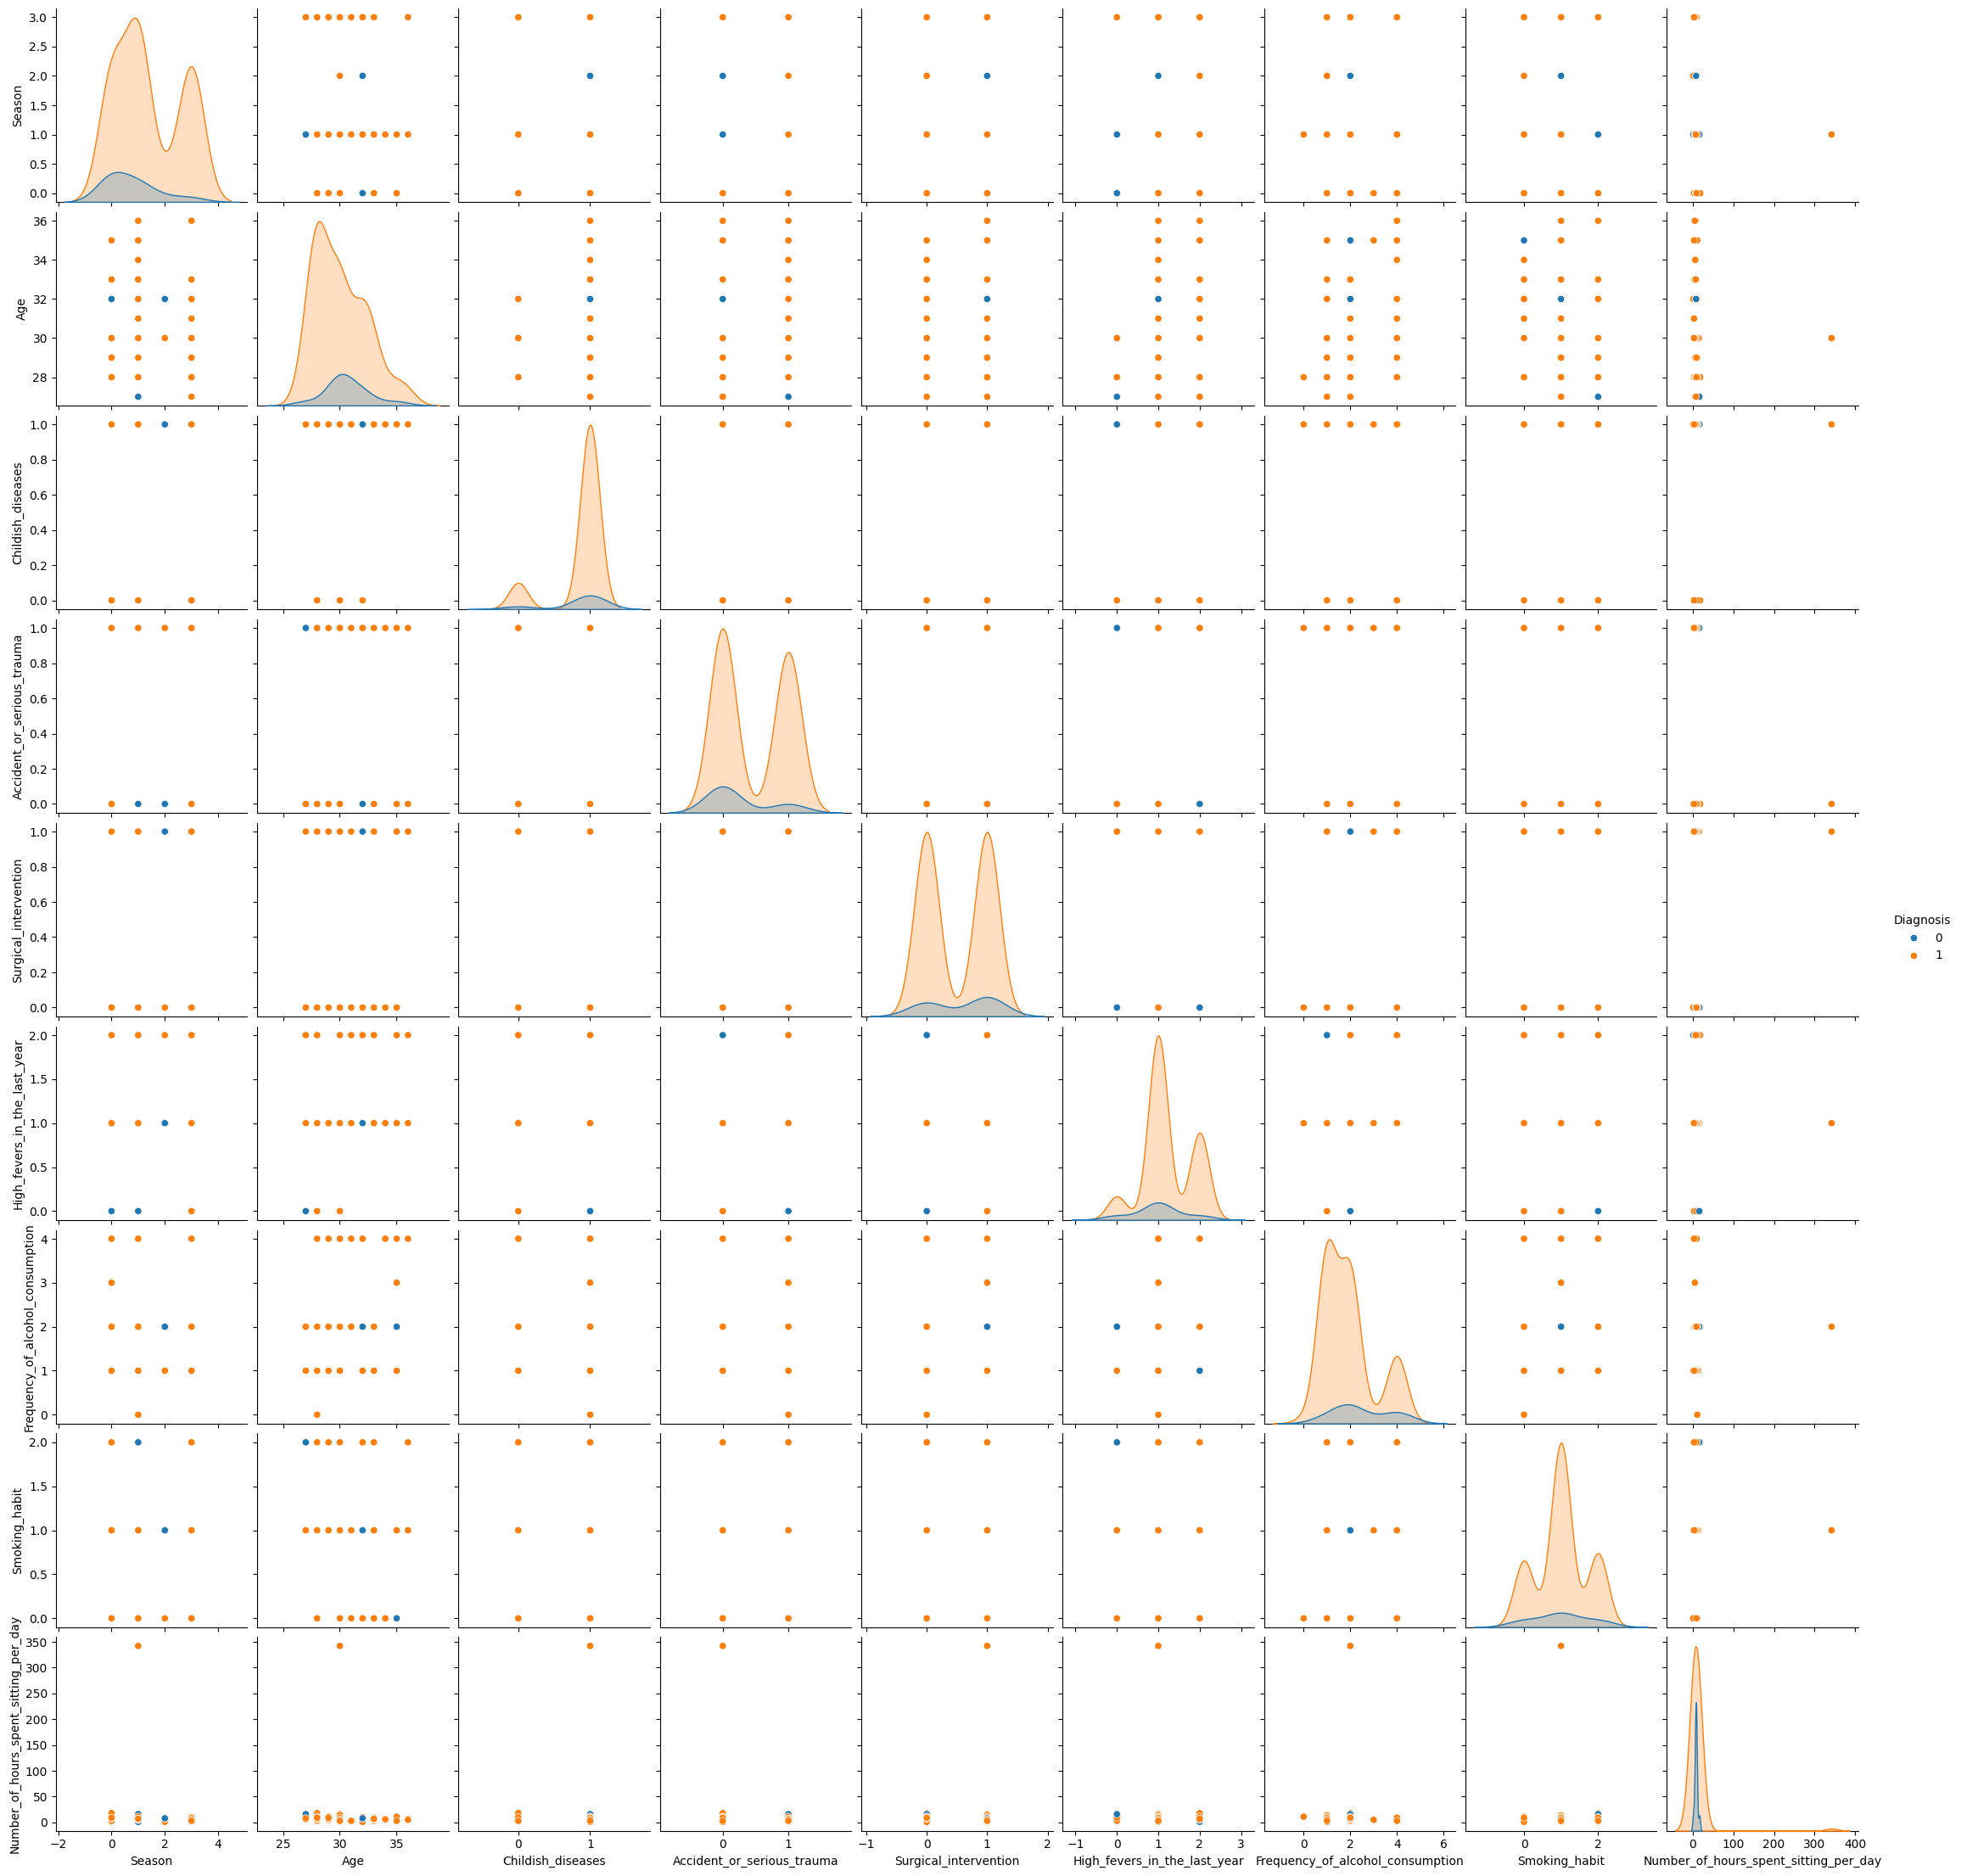

In [61]:
plt.figure(figsize=(20,15))
sns.pairplot(data=df, hue='Diagnosis')
plt.show()

<H1 style = "font-size: 25px; 
background-color: #6b98d0; 
border-radius: 15px 50px;
padding: 10px; 
text-align: center; color: Black; 
font-family: Georgia, serif"> 
Seperating the Independent and Dependent Variable </H1>

In [55]:
X = df.drop('Diagnosis',axis=1)
y = df['Diagnosis']

In [56]:
X.head()

,Season,Age,Childish_diseases,Accident_or_serious_trauma,Surgical_intervention,High_fevers_in_the_last_year,Frequency_of_alcohol_consumption,Smoking_habit,Number_of_hours_spent_sitting_per_day
0,1,30,0,1,1,1,2,2,16
1,1,35,1,0,1,1,2,0,6
2,1,27,1,0,0,1,1,1,9
3,1,32,0,1,1,1,1,1,7
4,1,30,1,1,0,1,2,1,9


In [57]:
y.head()

0    1
1    0
2    1
3    1
4    0
Name: Diagnosis, dtype: int32

<H1 style = "font-size: 25px; 
background-color: #6b98d0; 
border-radius: 15px 50px;
padding: 10px; 
text-align: center; color: Black; 
font-family: Georgia, serif"> 
Perfoming the Train Test Split </H1>

In [63]:
from sklearn.model_selection import train_test_split

Xtrain,Xtest, ytrain,ytest = train_test_split(X,y, test_size=0.20, random_state=42)

In [64]:
Xtrain.shape, ytrain.shape

((80, 9), (80,))

In [65]:
Xtest.shape,ytest.shape

((20, 9), (20,))

In [69]:
num_cols = X.select_dtypes(include='number').columns

In [70]:
num_cols

Index(['Season', 'Age', 'Childish_diseases', 'Accident_or_serious_trauma',
       'Surgical_intervention', 'High_fevers_in_the_last_year',
       'Frequency_of_alcohol_consumption', 'Smoking_habit',
       'Number_of_hours_spent_sitting_per_day'],
      dtype='object')

<H1 style = "font-size: 25px; 
background-color: #6b98d0; 
border-radius: 15px 50px;
padding: 10px; 
text-align: center; color: Black; 
font-family: Georgia, serif"> 
Creating the Pipeline For Numerical and Categorical Columns </H1>

In [66]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer

In [71]:
# Numerical Pipeline ______________________________________________________________________________________________________________________

num_pipe = Pipeline(steps=[
    ('impute',SimpleImputer(strategy='mean')),
    ('scaler',StandardScaler())
])


# Column Transformer ______________________________________________________________________________________________________________________

preprocessor = ColumnTransformer([
    ('numerical_pipe', num_pipe, num_cols)
])  

In [72]:
preprocessor

ColumnTransformer(transformers=[('numerical_pipe',
                                 Pipeline(steps=[('impute', SimpleImputer()),
                                                 ('scaler', StandardScaler())]),
                                 Index(['Season', 'Age', 'Childish_diseases', 'Accident_or_serious_trauma',
       'Surgical_intervention', 'High_fevers_in_the_last_year',
       'Frequency_of_alcohol_consumption', 'Smoking_habit',
       'Number_of_hours_spent_sitting_per_day'],
      dtype='object'))])

In [73]:
scaled_xtrain = preprocessor.fit_transform(Xtrain)

In [75]:
scaled_xtest = preprocessor.transform(Xtest)

<H1 style = "font-size: 25px; 
background-color: #6b98d0; 
border-radius: 15px 50px;
padding: 10px; 
text-align: center; color: Black; 
font-family: Georgia, serif"> 
Model Tranning  </H1>

In [76]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score

In [77]:
models = {
    'Ranom Forest' : RandomForestClassifier(),
    'Logistic Regression' : LogisticRegression(),
    'Decision Tree':  DecisionTreeClassifier(),
    'Support Vectore Classifer': SVC()
}

In [78]:
def evaluate_model(Xtrain,ytrain,Xtest,ytest, models):
    
    report = {}
    
    for i in range(len(models)):
        model = list(models.values())[i]
        # Traning The Model 
        model.fit(Xtrain,ytrain)
        
        # Predicting the Model
        y_pred = model.predict(Xtest)
        
        # getting the Accuracy Score:
        
        model_score = accuracy_score(ytest,y_pred)
        
        report[list(models.keys())[i]] = model_score
        
    return report

In [80]:
evaluate_model(scaled_xtrain,ytrain,scaled_xtest,ytest,models)

{'Ranom Forest': 0.9,
 'Logistic Regression': 0.9,
 'Decision Tree': 0.85,
 'Support Vectore Classifer': 0.9}